In [99]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

from scipy.special import cbrt

# Решение кубических уравнений методом кардано

Дано кубичесткое уравнение P, вида:
$$
ax^3 + bx^2 + cx + d = 0, a \ne 0
$$

Корни уравнения:
$$
x1 = S + T - \frac{b}{3a}
$$
$$
x2 = -\frac{S + T}{2} - \frac{b}{3a} - \frac{i\sqrt3}{3a}(S - T)
$$
$$
x3 = -\frac{S + T}{2} - \frac{b}{3a} + \frac{i\sqrt3}{3a}(S - T)
$$
где:

$$
S = \sqrt[3]{R + \sqrt(Q^3 + R^3)}
$$
$$
T = \sqrt[3]{R - \sqrt(Q^3 + R^3)}
$$
где:

$$
Q = \frac{3ac - b^2}{9a^2}
$$

$$
R = \frac{9abc - 27a^2d - 2b^3}{54a^3}
$$

При этом выражение $D = Q^3 + R^2$ называется дискриминантом

if $D > 0$, Один действительный корень, два комплексных

if $D <= 0$, Все корни действительные

### Источник с выводом формул:
[https://proofwiki.org/wiki/Cardano's_Formula](https://proofwiki.org/wiki/Cardano's_Formula)

In [8]:
def cardano(a, b, c, d):
    if a == 0:
        raise ValueError('Параметр a не может быть равен 0')
        
    Q = (3*a*c - b**2)/ (9*a**2)
    R = (9*a*b*c - 27*a**2*d - 2*b**3) / (54 * a**3)
    D = Q**3 + R**2

    S = cbrt(R + np.sqrt(D))
    T = cbrt(R - np.sqrt(D)) 

    if D > 0:
        t = 0.5j * np.sqrt(3) * (S - T)
    else:
        t = 0.5 * np.sqrt(3) * (S - T)
    
    y0 = - b / (3 * a) + (S + T)
    y1 = - b / (3 * a)  - (S + T) / 2 + t
    y2 = - b / (3 * a)  - (S + T) / 2 -  t

    return y0, y1, y2

Функция расчёта машинного ноля(эпсилон)

In [9]:
def get_eps():
    return sys.float_info.epsilon

In [10]:
get_eps()

2.220446049250313e-16

Функция для оценки точности в дальнейшем: $x^3 + 3x^2 + \lambda^2x + 3\lambda^2=0$

In [61]:
def f(x, a):
    return x**3 + 3*x**2 + a**2*x + 3*a**2;

Работа функции, вычисления корней уравнения на примере вышеупомянутой функции

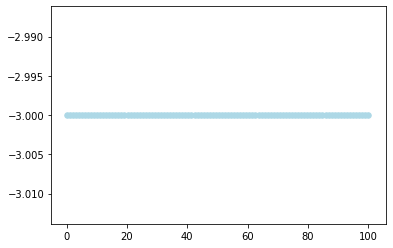

In [43]:
xx = np.linspace(0, 100, 100)

for x in xx: 
    y0 = cardano(1, 3, x**2, 3*x**2)[0]

    plt.scatter(x, y0, c ='lightblue', s = 30)
    
plt.show()

Оценка точности работы формулы для функции $x^3 + 3x^2 + \lambda^2x + 3\lambda^2=0, \lambda \in [0, 1/eps)$

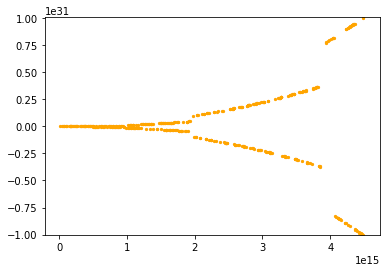

Ymin=-1.0019814915266518e+31
Ymax=1.0070305210322068e+31


In [55]:
y_min = 0
y_max = 0

xx = np.linspace(0, 1./get_eps(), 2000)

for x in xx: 
    y0 = cardano(1, 3, x**2, 3*x**2)[0]
    y = f(y0, x)
    
    if y != 0:
        y_max = max(y_max, y)
        y_min = min(y_min, y)
    
        plt.scatter(x, y, c = 'orange', s = 5)

plt.ylim(bottom = y_min, top = y_max)
plt.show()

print('Ymin={0}'.format(y_min))
print('Ymax={0}'.format(y_max))

Сравнение точности работы формулы Кардано, метода Ньютона и метода Брента

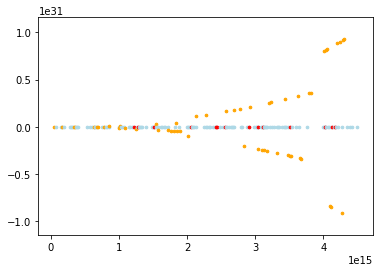

In [98]:
y_max = 0
y_min = 0

xx = np.linspace(0, 1./get_eps(), 300)

for x in xx: 
    cardano_y = f(cardano(1, 3, x**2, 3*x**2)[0], x)
    newton_y = f(opt.newton(lambda _x:f(_x, x), 0), x)
    brentq_y = f(opt.brentq(lambda _x:f(_x, x), -99999, 999999), x)
    
    if newton_y != 0:
        y_max = max(y_max, newton_y)
        y_min = min(y_min, newton_y)

        plt.scatter(x, newton_y, c = 'lightblue', s = 7)
        
    if cardano_y != 0:
        y_max = max(y_max, cardano_y)
        y_min = min(y_min, cardano_y)
        
        plt.scatter(x, cardano_y, c = 'orange', s = 7)
        
        
    if brentq_y != 0:
        y_max = max(y_max, brentq_y)
        y_min = min(y_min, brentq_y)

        plt.scatter(x, newton_y, c = 'red', s = 7)
        
        
plt.ylim(bottom = y_min * 1.25, top = y_max * 1.25)
plt.show()

## Вывод
Метод Кардано имеет большую предраспол